In [567]:
template.shape

(492, 224)

In [566]:
template

array([[101, 101, 101, ..., 113, 112, 112],
       [101, 101, 101, ..., 113, 113, 112],
       [101, 101, 101, ..., 113, 113, 113],
       ..., 
       [138, 138, 138, ..., 144, 144, 144],
       [138, 138, 138, ..., 145, 145, 145],
       [138, 138, 138, ..., 145, 145, 145]], dtype=uint8)

In [570]:
template.shape

(318, 268)

In [6]:
template

array([[103, 117, 115, ..., 119, 118, 117],
       [103, 109, 105, ..., 117, 117, 115],
       [109, 108, 102, ..., 115, 114, 113],
       ..., 
       [ 78, 123,  88, ...,  92,  93,  94],
       [ 77, 106,  85, ...,  95,  94,  91],
       [ 91, 101,  95, ...,  96,  95,  90]], dtype=uint8)

In [10]:
x = np.zeros([1,4])
x

array([[ 0.,  0.,  0.,  0.]])

In [16]:
def tt(a,b,c,d):
    return a, b, c, d

tt(*x[0])

(0.0, 0.0, 0.0, 0.0)

In [8]:
list(template)

[array([103, 117, 115, 101, 101, 106,  99, 116,  95,  77,  75,  77,  80,
         92, 106,  94,  70,  93, 117,  90,  70,  84,  93,  84,  78,  80,
         89,  90,  86,  92, 104,  76,  83,  95,  97,  94, 103, 110, 101,
         91,  92,  92,  89,  84,  83,  85,  88,  86,  89,  91,  90,  88,
         87,  90,  92,  94,  85,  80,  84,  87,  87,  91,  98,  99,  98,
         95,  90,  85,  84,  88,  92,  76,  75,  82,  96, 104,  99,  87,
         80,  81,  88,  93,  90,  84,  87, 100, 113, 109, 106, 100,  93,
         89,  90,  95,  99, 115, 106, 100, 103, 109, 110, 111, 113, 102,
        107, 107,  97,  87,  93, 115, 135, 163, 180, 183, 152, 101,  66,
         65,  79, 105, 104, 118, 125,  70,  59, 107,  88,  65,  84,  96,
         91,  86,  90,  95,  95,  96,  94,  94,  99, 107, 108, 100,  89,
         86,  91,  85,  78,  92, 114, 110,  88,  94,  95,  97,  99, 101,
        102, 102, 103, 101, 103, 102, 100, 102, 106, 105, 100, 103, 103,
        104, 105, 105, 105, 104, 104, 104, 104, 104

['img_00107_template_0.npy']


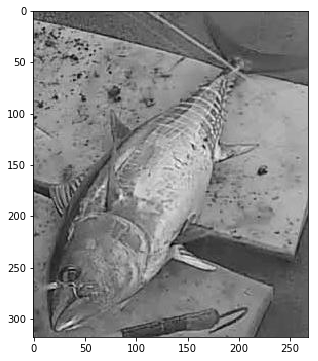

In [5]:
import numpy as np
import os

f = '../train/BET'
print([x for x in os.listdir(f) if x.find('.npy') > -1])
np_file = os.path.join(f, [x for x in os.listdir(f) if x.find('.npy') > -1][0])
np_file

import matplotlib.pyplot as plt
%matplotlib inline

template = np.load(np_file)
template = np.asarray(template, dtype=np.uint8)
plt.figure(figsize=(17,6))
plt.imshow(template, 'gray')

In [660]:
img.shape

(854, 1518, 3)

In [659]:
resized.shape[1] * ratio

1518.0

In [657]:
cv2.GaussianBlur(resized, (11, 11), 0).shape

(170, 303)

1.0
1.2504118616144975
1.6681318681318682
2.500823723228995
5.00990099009901

0.2793


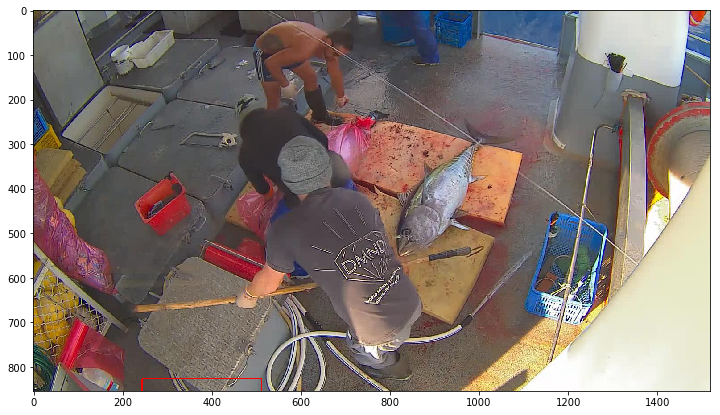

In [675]:
t0 = time()

template_threshold = 0.5
nms_threshold = 0.2

img = cv2.imread('../train/BET/img_00107.jpg')
# img = cv2.imread('img_04718.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
w, h = gray.shape[::-1]
t_w, t_h = template.shape[::-1]
boxes = np.zeros([0,4])

for scale in np.linspace(0.2, 1.0, 5)[::-1]:
    resized = imutils.resize(gray, width=int(w * scale))
    ratio = w / float(resized.shape[1])
    print(ratio)
    
    if resized.shape[0] < t_h or resized.shape[1] < t_w:
        break
    
    edged = get_template(resized)
    res = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF_NORMED)
    div = res.shape[1]
    res = res.reshape(-1)
    inds = res.argsort()[::-1]
    n = np.sum(res[inds] > template_threshold)
    inds = inds[:n]
    scale_boxes = np.zeros([n, 4])
    scale_boxes[:, 0] = np.floor(inds / div)
    scale_boxes[:, 1] = inds % div
    scale_boxes[:, 2] = scale_boxes[:, 0] + t_w
    scale_boxes[:, 3] = scale_boxes[:, 1] + t_h
    scale_boxes2 = np.asarray(scale_boxes, dtype=np.int)
    boxes = np.vstack((boxes, scale_boxes2))

boxes = np.asarray(boxes, dtype=np.int)
boxes = non_max_suppression(boxes, overlapThresh=nms_threshold)

for x1, y1, x2, y2 in boxes:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)

print('\n%.4f' % (time() - t0))

fig, ax = plt.subplots(figsize=(17, 7))
plt.imshow(imutils.opencv2matplotlib(img))

In [670]:
scale_boxes

array([[  19.,  473.,  243.,  965.],
       [  18.,  473.,  242.,  965.],
       [  17.,  473.,  241.,  965.],
       ..., 
       [  11.,  467.,  235.,  959.],
       [  27.,  467.,  251.,  959.],
       [  22.,  465.,  246.,  957.]])

In [676]:
boxes

array([[ 244,  826,  512, 1144]])

In [668]:
scale_boxes2

array([[  31,  788,  405, 1608],
       [  30,  788,  403, 1608],
       [  28,  788,  401, 1608],
       ..., 
       [  18,  778,  391, 1598],
       [  45,  778,  418, 1598],
       [  36,  775,  410, 1595]])

In [631]:
scale_boxes

array([[  240.,   801.,   508.,  1119.],
       [  240.,   800.,   508.,  1118.],
       [  240.,   802.,   508.,  1120.],
       ..., 
       [  240.,   832.,   508.,  1150.],
       [  246.,   773.,   514.,  1091.],
       [  225.,   774.,   493.,  1092.]])

In [624]:
boxes

array([[ 247,  832,  515, 1150]])

In [622]:
np.asarray(np.asarray(scale_boxes * ratio), dtype=np.int)

array([[1202, 4012, 2545, 5606],
       [1202, 4007, 2545, 5601],
       [1202, 4017, 2545, 5611],
       ..., 
       [1202, 4168, 2545, 5761],
       [1232, 3872, 2575, 5465],
       [1127, 3877, 2469, 5470]])

In [620]:
np.asarray(scale_boxes * ratio)

array([[ 1202.37623762,  4012.93069307,  2545.02970297,  5606.07920792],
       [ 1202.37623762,  4007.92079208,  2545.02970297,  5601.06930693],
       [ 1202.37623762,  4017.94059406,  2545.02970297,  5611.08910891],
       ..., 
       [ 1202.37623762,  4168.23762376,  2545.02970297,  5761.38613861],
       [ 1232.43564356,  3872.65346535,  2575.08910891,  5465.8019802 ],
       [ 1127.22772277,  3877.66336634,  2469.88118812,  5470.81188119]])

In [617]:
np.asarray(scale_boxes * ratio, dtype=np.uint8)

array([[178, 172, 241, 230],
       [178, 167, 241, 225],
       [178, 177, 241, 235],
       ..., 
       [178,  72, 241, 129],
       [208,  32,  15,  89],
       [103,  37, 165,  94]], dtype=uint8)

In [616]:
scale_boxes

array([[  240.,   801.,   508.,  1119.],
       [  240.,   800.,   508.,  1118.],
       [  240.,   802.,   508.,  1120.],
       ..., 
       [  240.,   832.,   508.,  1150.],
       [  246.,   773.,   514.,  1091.],
       [  225.,   774.,   493.,  1092.]])

In [614]:
scale_boxes2

array([[240,  33, 252,  95],
       [240,  32, 252,  94],
       [240,  34, 252,  96],
       ..., 
       [240,  64, 252, 126],
       [246,   5,   2,  67],
       [225,   6, 237,  68]], dtype=uint8)

In [586]:
scale_boxes

array([[  19.,  473.,  243.,  965.],
       [  18.,  473.,  242.,  965.],
       [  17.,  473.,  241.,  965.],
       ..., 
       [  11.,  467.,  235.,  959.],
       [  27.,  467.,  251.,  959.],
       [  22.,  465.,  246.,  957.]])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f25a1bec940>,
 <matplotlib.image.AxesImage at 0x7f25a1cea550>)

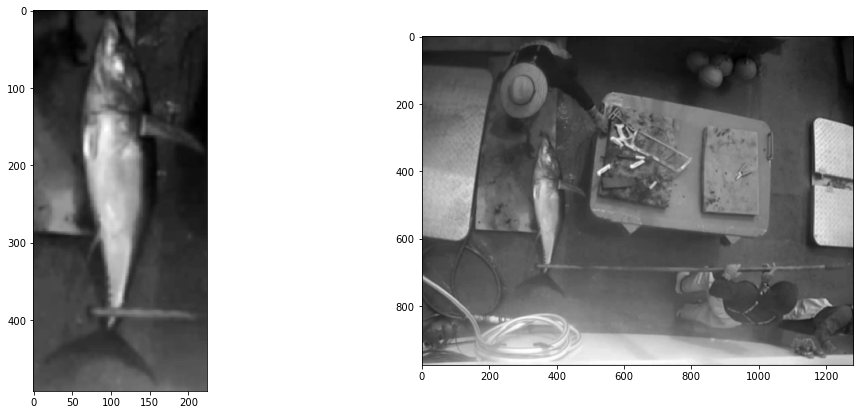

In [661]:
img = cv2.imread('img_04718.jpg')
im_array = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def get_template(template):
#     template = cv2.medianBlur(template,5)
#     _, template = cv2.threshold(template, 127, 255, cv2.THRESH_BINARY)
#     _, template = cv2.threshold(template,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#     template = cv2.GaussianBlur(template,(5,5),0)
#     _,template = cv2.threshold(template,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    template = cv2.GaussianBlur(template, (11, 11), 0)
#     template = cv2.Canny(template, 50, 200)
#     template = imutils.auto_canny(template)
    
    return template

template = np.zeros([ end_y - start_y, end_x - start_x], dtype='uint8')
template[:, :] = im_array[start_y:end_y, start_x:end_x]
template = get_template(template)
im_array = get_template(im_array)

plt.subplots(figsize=(17, 7))
plt.subplot(121),plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

In [217]:
import os
import cv2
import json
import random
import imutils
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [218]:
with open('img_04718.json') as f:
    box = json.load(f)['boxes'][0]
box

{'h': 492, 'w': 224, 'x': 377, 'y': 537}

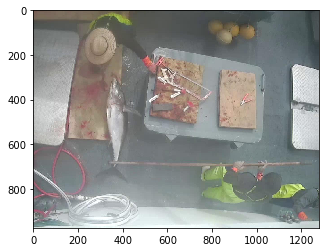

In [219]:
img = cv2.imread('img_04718.jpg')
plt.imshow(imutils.opencv2matplotlib(img))

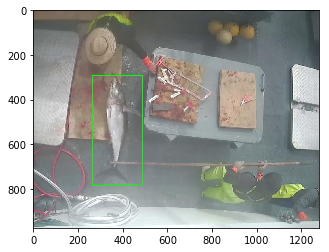

In [436]:
with_box = img.copy()
start_x = box['x'] - int((box['w'] / 2))
start_y = box['y'] - int((box['h'] / 2))
end_x = box['x'] + int((box['w'] / 2))
end_y = box['y'] + int((box['h'] / 2))
cv2.rectangle(with_box, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)

plt.imshow(imutils.opencv2matplotlib(with_box))

In [437]:
template2 = im_array[start_y:end_y, start_x:end_x].copy()
template2

array([[100, 100, 100, ..., 112, 111, 111],
       [101, 101, 101, ..., 112, 112, 111],
       [101, 101, 101, ..., 112, 112, 111],
       ..., 
       [138, 138, 138, ..., 145, 145, 145],
       [138, 138, 138, ..., 145, 145, 145],
       [139, 139, 139, ..., 145, 145, 145]], dtype=uint8)

In [438]:
template = np.zeros([ end_y - start_y, end_x - start_x], dtype='uint8')
template[:, :] = im_array[start_y:end_y, start_x:end_x]
template

array([[100, 100, 100, ..., 112, 111, 111],
       [101, 101, 101, ..., 112, 112, 111],
       [101, 101, 101, ..., 112, 112, 111],
       ..., 
       [138, 138, 138, ..., 145, 145, 145],
       [138, 138, 138, ..., 145, 145, 145],
       [139, 139, 139, ..., 145, 145, 145]], dtype=uint8)

In [468]:
os.listdir('.')

['test.npy',
 'match_template_tests.ipynb',
 'img_04718.json',
 '.ipynb_checkpoints',
 'img_04718.jpg',
 'img_06776.jpg']

In [469]:
np.load('test.npy')

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [466]:
x = np.zeros([4,4])
x


array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [467]:
np.save('test.npy', x)

In [462]:
os.path.basename(xx)

'tempd_4.json'

In [460]:
folder = '../123'
x = (os.path.join(folder, f) for f in os.listdir(folder))
for xx in x:
    print(xx)
    
    

../123/tempd_4.json


In [386]:
for scale in np.linspace(0.2, 1.0, 5)[::-1]:
    print(scale)

1.0
0.8
0.6
0.4
0.2


In [518]:
np.vstack((qq, boxes, boxes, boxes))

array([[    3.,   793.,   376.,  1613.],
       [  335.,   276.,   559.,   768.],
       [    3.,   793.,   376.,  1613.],
       [  335.,   276.,   559.,   768.],
       [    3.,   793.,   376.,  1613.],
       [  335.,   276.,   559.,   768.]])

In [400]:
boxes

[]

In [479]:
np.linspace(0.2, 1.0, 1)[::-1]

array([ 0.2])

In [496]:
boxes*.5

array([[    0. ,   406.5,   186.5,  1087.5],
       [  129. ,   126.5,   301.5,   466. ],
       [    0. ,   158. ,   112. ,   404. ],
       [   58.5,    13.5,   170.5,   259.5]])

In [495]:
np.asarray(boxes*.5, dtype=np.int)

array([[   0,  406,  186, 1087],
       [ 129,  126,  301,  466],
       [   0,  158,  112,  404],
       [  58,   13,  170,  259]])

In [537]:
boxes[:,3][boxes[:,3] > 800] = 800
boxes

array([[  3, 793, 376, 800],
       [335, 276, 559, 768]])

In [532]:
boxes[]

array([[   3,  793,  376, 1613],
       [ 335,  276,  559,  768]])

../train/BET/img_05616.jpg
1.0
1.25
1.6666666666666667
2.5

0.2914


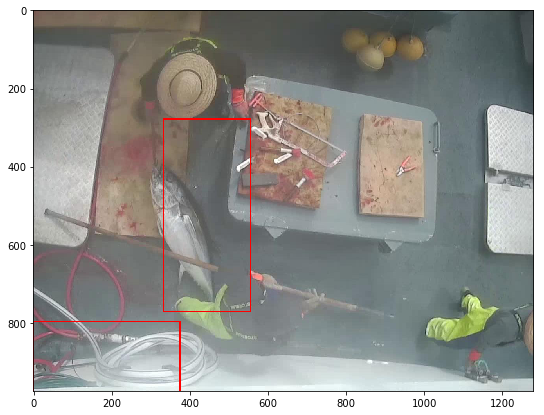

In [552]:
t0 = time()

template_threshold = 0.5
nms_threshold = 0.2
folder_path = '../train/BET'
files = os.listdir(folder_path)
file = os.path.join(folder_path, random.choice(files))
print(file)

img = cv2.imread(file)
img = cv2.imread('../train/BET/img_00732.jpg')
# img = cv2.imread('img_04718.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
w, h = gray.shape[::-1]
t_w, t_h = template.shape[::-1]
boxes = np.zeros([0,4])

for scale in np.linspace(0.2, 1.0, 5)[::-1]:
    resized = imutils.resize(gray, width=int(w * scale))
    ratio = w / float(resized.shape[1])
    print(ratio)
    
    if resized.shape[0] < t_h or resized.shape[1] < t_w:
        break
    
    edged = get_template(resized)
    res = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF_NORMED)
    div = res.shape[1]
    res = res.reshape(-1)
    inds = res.argsort()[::-1]
    n = np.sum(res[inds] > template_threshold)
    inds = inds[:n]
    scale_boxes = np.zeros([n, 4])
    scale_boxes[:, 0] = np.floor(inds / div)
    scale_boxes[:, 1] = inds % div
    scale_boxes[:, 2] = scale_boxes[:, 0] + t_w
    scale_boxes[:, 3] = scale_boxes[:, 1] + t_h
    scale_boxes = np.asarray(scale_boxes * ratio, dtype=np.int)
    boxes = np.vstack((boxes, scale_boxes))

boxes = np.asarray(boxes, dtype=np.int)
boxes = non_max_suppression(boxes, overlapThresh=nms_threshold)

for x1, y1, x2, y2 in boxes:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)

print('\n%.4f' % (time() - t0))

fig, ax = plt.subplots(figsize=(17, 7))
plt.imshow(imutils.opencv2matplotlib(img))

In [531]:
np.max(res)

0.51621854

In [530]:
res[inds[0]]

0.51621854

../train/BET/img_01351.jpg
0.2259


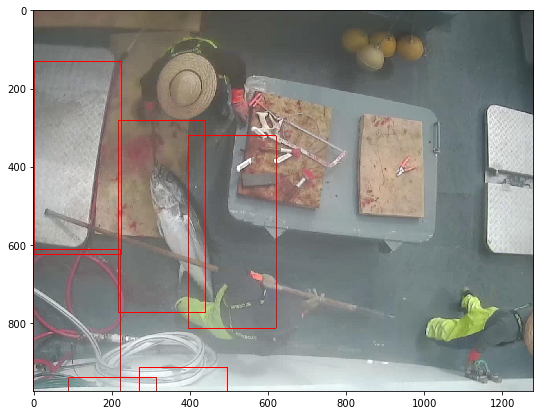

In [547]:
t0 = time()

template_threshold = 0.2
nms_threshold = 0.2
folder_path = '../train/BET'
files = os.listdir(folder_path)
file = os.path.join(folder_path, random.choice(files))
print(file)

img = cv2.imread(file)
img = cv2.imread('../train/BET/img_00732.jpg')
# img = cv2.imread('img_04718.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = get_template(gray)
w, h = template.shape[::-1]
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
div = res.shape[1]
res = res.reshape(-1)
inds = res.argsort()[::-1]
n = np.sum(res[inds] > template_threshold)
inds = inds[:n]
boxes = np.zeros([n, 4])
boxes[:, 0] = np.floor(inds / div)
boxes[:, 1] = inds % div
boxes[:, 2] = boxes[:, 0] + w
boxes[:, 3] = boxes[:, 1] + h
boxes = non_max_suppression(boxes, overlapThresh=nms_threshold)

for x1, y1, x2, y2 in boxes:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)

print('%.4f' % (time() - t0))

fig, ax = plt.subplots(figsize=(17, 7))
plt.imshow(imutils.opencv2matplotlib(img))

../train/BET/img_00363.jpg


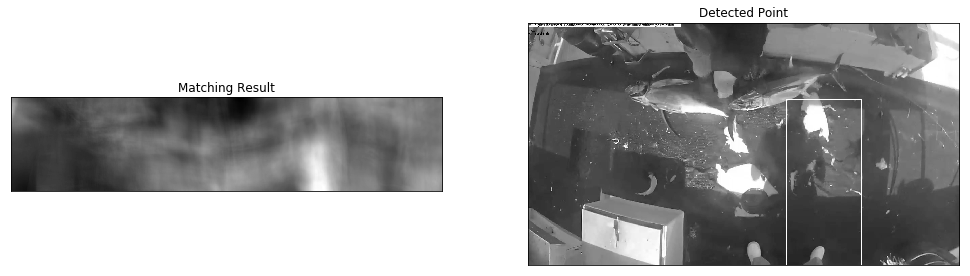

In [225]:
folder_path = '../train/BET'
files = os.listdir(folder_path)
file = os.path.join(folder_path, random.choice(files))
print(file)

img = cv2.imread(file, 0)
w, h = template.shape[::-1]

# Apply template Matching
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

fig, ax = plt.subplots(figsize=(17, 7))
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()

In [121]:
inds = res.argsort(axis=None)[::-1]
div = res.shape[1]
ind = inds[0]

In [118]:
ind

array([307840, 308897, 307839, ..., 275846, 274790, 276903])

In [ ]:
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.5

In [124]:
int(ind / div), ind % div

(291, 253)

In [132]:
np.zeros([, 4])

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [ ]:
np.where()

In [148]:
res = res.reshape(-1)
res

array([ 0.25282025,  0.25504443,  0.25734019, ..., -0.15342304,
       -0.15463677, -0.15495558], dtype=float32)

In [151]:
res[res > threshold]

array([ 0.50157386,  0.50264949,  0.50296468, ...,  0.50130522,
        0.50027257,  0.50000131], dtype=float32)

In [149]:
np.where(res > threshold)

(array([284581, 284582, 284583, ..., 364934, 364935, 365990]),)

In [162]:
res[307840]

0.54571164

In [170]:
n = np.sum(res[inds] > threshold)
n

1628

In [176]:
inds

array([307840, 308897, 307839, ..., 285636, 306771, 365990])

In [201]:
for x,y,xx,yy in boxes:
    1 + 1
    
(x, y), (xx, yy)

SyntaxError: can't use starred expression here (<ipython-input-201-39f3a829110c>, line 4)

In [190]:
non_max_suppression(boxes, overlapThresh=0.8)

array([[325, 273, 549, 765],
       [283, 264, 507, 756]])

In [181]:
np.floor(inds / div)

array([ 291.,  292.,  291., ...,  270.,  290.,  346.])

In [186]:
from time import time

t0 = time()

img = cv2.imread('../train/BET/img_00732.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
inds = res.argsort(axis=None)[::-1]
div = res.shape[1]
boxes = []

for ind in inds:
    x = int(ind / div)
    y = ind % div
    box = ((x, y), (x + w, y + h))
    boxes.append(box)

print('%.4f' % (time() - t0))

# xx = int(ind / 1057), ind % 1057
# cv2.rectangle(img, xx, (xx[0] + w, xx[1] + h), (0,0,255), 2)

# fig, ax = plt.subplots(figsize=(17, 7))
# plt.imshow(imutils.opencv2matplotlib(img))

0.9262


In [105]:
from imutils.object_detection import non_max_suppression
non_max_suppression(test, overlapThresh=0.8)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [116]:
res.shape

(483, 1057)

In [112]:
ind

array([307840, 308897, 307839, ..., 275846, 274790, 276903])

In [113]:
img.shape

(974, 1280, 3)

In [111]:
test = [(int(i / 1057), i % 1057) for i in ind]
test = np.hstack((test, (test[0] + w, test[1] + h)))
test = np.asarray(test)
test

TypeError: can only concatenate tuple (not "int") to tuple

In [22]:
np.max(res)

0.54571164

In [76]:
res[xx]

0.54571164

In [64]:
res.shape

(483, 1057)

In [52]:
res.argmax()

307840

In [79]:
ind = res.argsort(axis=None)[::-1][0]
xx = int(ind / 1057), ind % 1057
xx

(291, 253)

In [43]:
res.argsort(axis=None)[450858]

10

In [78]:
res.argsort(axis=None)[::-1][0]

307840

In [73]:
np.where(res.argsort(axis=None)[::-1] == 0)

(array([74679]),)

In [10]:
loc

(array([269, 269, 269, ..., 345, 345, 346]),
 array([248, 249, 250, ..., 269, 270, 268]))

../train/BET/img_00732.jpg


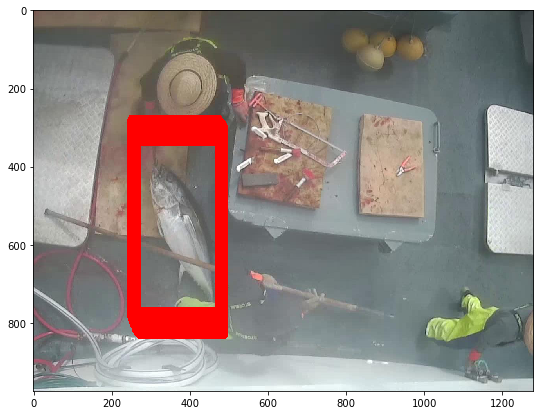

In [9]:
folder_path = '../train/BET'
files = os.listdir(folder_path)
file = os.path.join(folder_path, random.choice(files))
file = '../train/BET/img_00732.jpg'
print(file)

img = cv2.imread(file)
# img = cv2.imread('img_04718.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

# Apply template Matching
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

fig, ax = plt.subplots(figsize=(17, 7))
plt.imshow(imutils.opencv2matplotlib(img))